In [6]:
!pip install livelossplot
import pandas as pd
import numpy as np

In [ ]:
benign_df = pd.read_csv('/content/drive/MyDrive/dataset/5.benign.csv')

g_c_df = pd.read_csv('/content/drive/MyDrive/dataset/5.gafgyt.combo.csv')
g_j_df = pd.read_csv('/content/drive/MyDrive/dataset/5.gafgyt.junk.csv')
g_s_df = pd.read_csv('/content/drive/MyDrive/dataset/5.gafgyt.scan.csv')
g_t_df = pd.read_csv('/content/drive/MyDrive/dataset/5.gafgyt.tcp.csv')
g_u_df = pd.read_csv('/content/drive/MyDrive/dataset/5.gafgyt.udp.csv')
m_a_df = pd.read_csv('/content/drive/MyDrive/dataset/5.mirai.ack.csv')
m_sc_df = pd.read_csv('/content/drive/MyDrive/dataset/5.mirai.scan.csv')
m_sy_df = pd.read_csv('/content/drive/MyDrive/dataset/5.mirai.syn.csv')
m_u_df = pd.read_csv('/content/drive/MyDrive/dataset/5.mirai.udp.csv')
m_u_p_df = pd.read_csv('/content/drive/MyDrive/dataset/5.mirai.udpplain.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
benign_df['type'] = 'benign'
m_u_df['type'] = 'mirai_udp'
g_c_df['type'] = 'gafgyt_combo'
g_j_df['type'] = 'gafgyt_junk'
g_s_df['type'] = 'gafgyt_scan'
g_t_df['type'] = 'gafgyt_tcp'
g_u_df['type'] = 'gafgyt_udp'
m_a_df['type'] = 'mirai_ack'
m_sc_df['type'] = 'mirai_scan'
m_sy_df['type'] = 'mirai_syn'
m_u_p_df['type'] = 'mirai_udpplain'

In [ ]:
df = pd.concat([benign_df, m_u_df, g_c_df,
                g_j_df, g_s_df, g_t_df,
                g_u_df, m_a_df, m_sc_df,
                m_sy_df, m_u_p_df],
                axis=0, sort=False, ignore_index=True)

In [ ]:
df["type"].value_counts()


mirai_udp         156248
gafgyt_tcp        104510
gafgyt_udp        104011
mirai_scan         96781
mirai_syn          65746
benign             62154
gafgyt_combo       61380
mirai_ack          60554
mirai_udpplain     56681
gafgyt_junk        30898
gafgyt_scan        29297
Name: type, dtype: int64

<Axes: title={'center': 'Class Distribution'}>

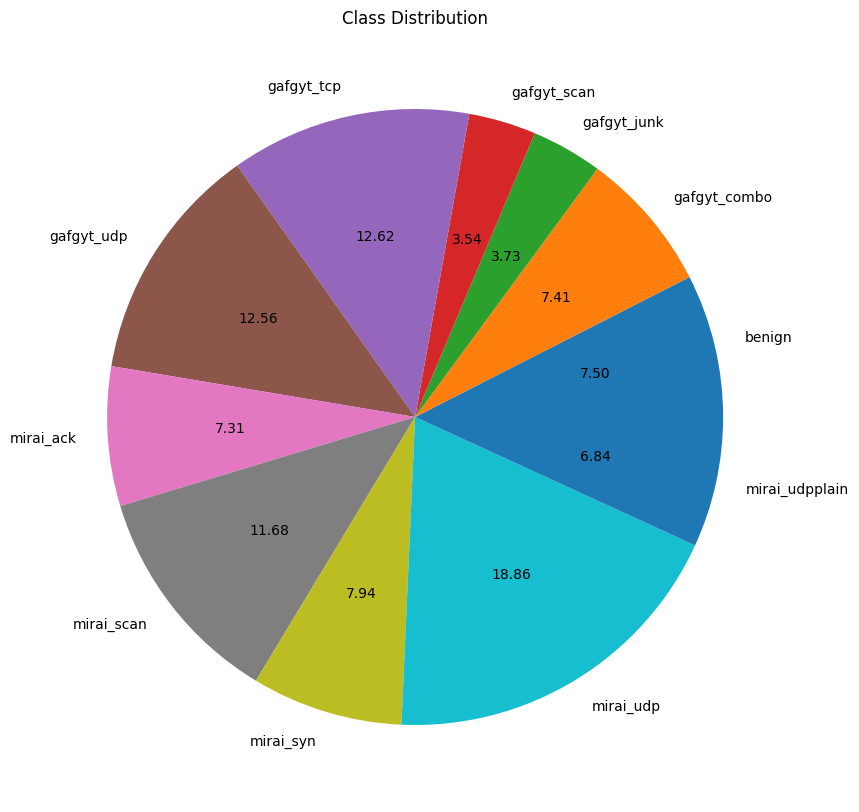

In [ ]:
from matplotlib import pyplot as plt

plt.title("Class Distribution")
df.groupby("type").size().plot(kind='pie', autopct='%.2f', figsize=(20,10))

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828260 entries, 0 to 828259
Columns: 116 entries, MI_dir_L5_weight to type
dtypes: float64(115), object(1)
memory usage: 733.0+ MB


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)


In [ ]:
df.head()


MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0         34.874527      173.120626        56709.430750         49.843920   
1          1.000000       60.000000            0.000000          1.000000   
2        137.258236      369.916927        57027.879151        194.262680   
3         87.072469       60.147976            2.856818        115.317629   
4         40.601095       74.127649            3.047280         54.050197   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0      173.609397        56359.665340         76.996780      172.652316   
1       60.000000            0.000000          1.000000       60.000000   
2      346.104246        59453.572055        475.233014      338.272941   
3       60.168570            3.246188        240.559017       60.131321   
4       74.197301            4.703279        129.370404       74.433697   

   MI_dir_L1_variance  MI_dir_L0.1_weight  ...  HpHp_L0.1_covariance  \
0        55307.067610          101.323848  ...           36805.33911   
1            0.000000            1.000000  ...               0.00000   
2        60004.421464         4267.645599  ...               0.00000   
3            2.483991         2023.273881  ...               0.00000   
4          151.231752          836.307546  ...               0.00000   

   HpHp_L0.1_pcc  HpHp_L0.01_weight  HpHp_L0.01_mean  HpHp_L0.01_std  \
0       0.494231           4.999762       198.598074    2.612171e+02   
1       0.000000           1.000000        60.000000    0.000000e+00   
2       0.000000           1.000000       554.000000    0.000000e+00   
3       0.000000           1.000000        60.000000    0.000000e+00   
4       0.000000           1.979361        74.000000    9.536743e-07   

   HpHp_L0.01_magnitude  HpHp_L0.01_radius  HpHp_L0.01_covariance  \
0            306.346193       1.061201e+05            36814.24151   
1             60.000000       0.000000e+00                0.00000   
2            554.000000       0.000000e+00                0.00000   
3             60.000000       0.000000e+00                0.00000   
4             74.000000       9.094947e-13                0.00000   

   HpHp_L0.01_pcc         type  
0        0.494353       benign  
1        0.000000   gafgyt_tcp  
2        0.000000    mirai_udp  
3        0.000000   mirai_scan  
4        0.000000  gafgyt_scan  

[5 rows x 116 columns]

In [ ]:
label_col = "type"

In [ ]:
feature_cols = list(df.columns)
feature_cols.remove(label_col)

In [ ]:
X = df[feature_cols]
y = df[label_col]

In [ ]:
X.shape

(828260, 115)

In [ ]:
df['type'].value_counts()

mirai_udp         156248
gafgyt_tcp        104510
gafgyt_udp        104011
mirai_scan         96781
mirai_syn          65746
benign             62154
gafgyt_combo       61380
mirai_ack          60554
mirai_udpplain     56681
gafgyt_junk        30898
gafgyt_scan        29297
Name: type, dtype: int64

In [ ]:
n_classes = len(np.unique(y))
n_classes

11

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828260 entries, 0 to 828259
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 726.7 MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

cls_label_encoder = LabelEncoder()
y = cls_label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y)

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 1.2114532692937052,
 1: 1.2267247252584497,
 2: 2.43697268828752,
 3: 2.5700610508187944,
 4: 0.7204704204034411,
 5: 0.7239251872885254,
 6: 1.2434632642299384,
 7: 0.7780056946605219,
 8: 1.1452571612276539,
 9: 0.48190443774373115,
 10: 1.3284174861416012}

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(662608, 115) (662608,)
(165652, 115) (165652,)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_train.shape, X_test.shape

((662608, 115, 1), (165652, 115, 1))

In [ ]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
y_train = to_categorical(y_train, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)

In [ ]:
input_shape = X_train.shape[1:]
input_shape

(115, 1)

In [ ]:
y_train.shape

(662608, 11)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool1D, GlobalAveragePooling1D, MaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate, GRU, Reshape
import tensorflow.keras.backend as K



In [ ]:
def bn_rl_conv(x,filters,kernel=1,strides=1):
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv1D(filters, kernel, strides=strides,padding = 'same')(x)
    return x

In [ ]:
def dense_block(x, repetition, filters):
    for _ in range(repetition):
        y = bn_rl_conv(x, 4*filters)
        y = bn_rl_conv(y, filters, 3)
        x = concatenate([y,x])
    return x

In [ ]:
def transition_layer(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
    x = AvgPool1D(2, strides = 2, padding = 'same')(x)
    return x

In [ ]:

def build_densenet(input_shape, n_classes, filters = 32):
    input = Input (input_shape)
    x = Conv1D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool1D(3, strides = 2, padding = 'same')(x)
    for repetition in [6,12,24,16]:

        d = dense_block(x, repetition, filters)
        x = transition_layer(d)

    x = GlobalAveragePooling1D()(d)
    output = Dense(n_classes, activation = 'softmax')(x)
    model = Model(input, output)
    return model

In [ ]:
import keras.backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
from tensorflow.keras.metrics import Recall, Precision
import tensorflow.keras as keras

filters = 32
clf = build_densenet(input_shape, n_classes, filters = 32)
clf.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), f1_score])

clf.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 115, 1)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 58, 64)               512       ['input_1[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 29, 64)               0         ['conv1d[0][0]']              
 D)                                                                                               
                                                                                                  
 batch_normalization (Batch  (None, 29, 64)               256       ['max_pooling1d[0][0]']   

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.700524 to fit



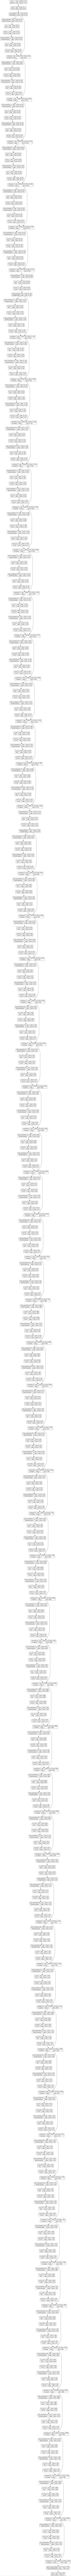

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(clf, to_file="model_fig.jpg", show_shapes=True)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from livelossplot import PlotLossesKeras


model_weights_file_path = "simple_model_weights.h5"
checkpoint = ModelCheckpoint(filepath=model_weights_file_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max", save_weights_only=True)
early_stopping = EarlyStopping(monitor="val_accuracy", mode="max", verbose=1, patience=20)
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=0, mode='max', min_delta=0.0001, cooldown=0, min_lr=0)
plotlosses = PlotLossesKeras()

call_backs = [checkpoint, early_stopping, lr_reduce, plotlosses]

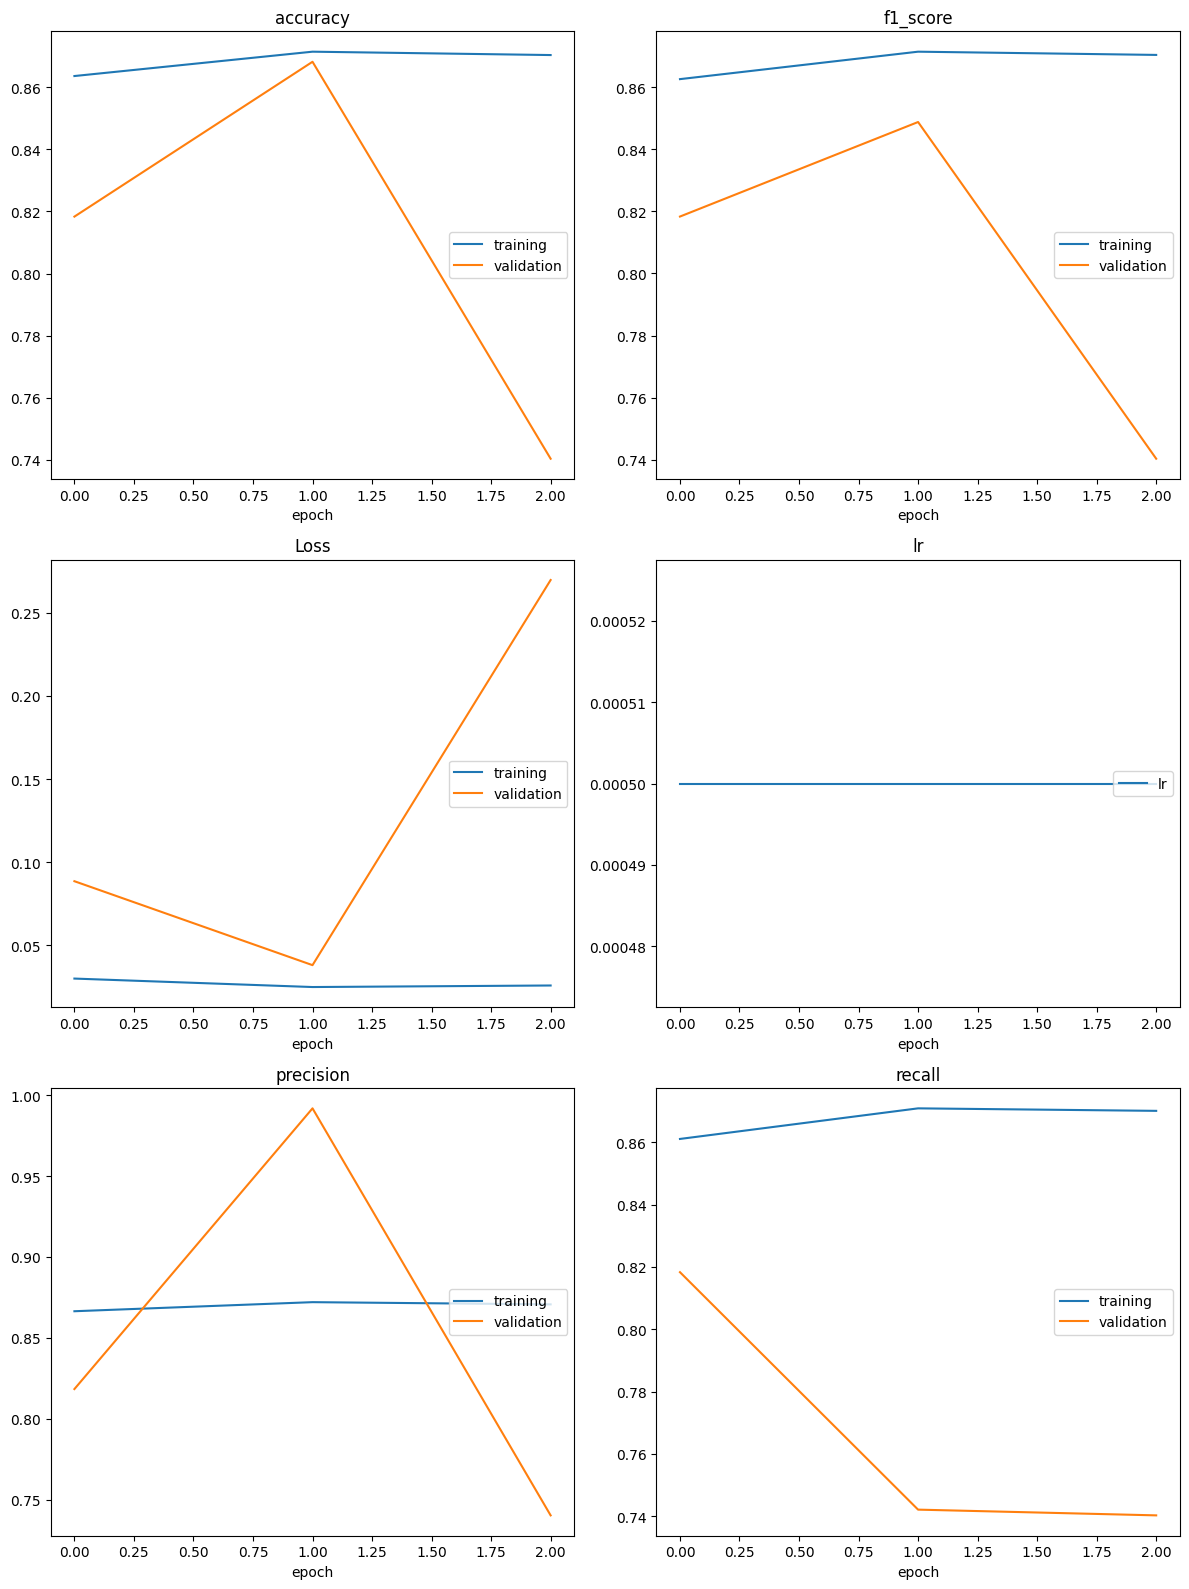

accuracy
	training         	 (min:    0.864, max:    0.871, cur:    0.870)
	validation       	 (min:    0.740, max:    0.868, cur:    0.740)
f1_score
	training         	 (min:    0.863, max:    0.871, cur:    0.870)
	validation       	 (min:    0.740, max:    0.849, cur:    0.740)
Loss
	training         	 (min:    0.025, max:    0.030, cur:    0.026)
	validation       	 (min:    0.038, max:    0.270, cur:    0.270)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)
precision
	training         	 (min:    0.866, max:    0.872, cur:    0.871)
	validation       	 (min:    0.740, max:    0.992, cur:    0.740)
recall
	training         	 (min:    0.861, max:    0.871, cur:    0.870)
	validation       	 (min:    0.740, max:    0.818, cur:    0.740)
1295/1295 [==============================] - 356s 275ms/step - loss: 0.0259 - accuracy: 0.8704 - precision: 0.8707 - recall: 0.8701 - f1_score: 0.8704 - val_loss: 0.2697 - val_accuracy: 0.7403 - val_precision: 0.7404 - val_recall: 

In [ ]:
EPOCHS = 3
BATCH_SIZE = 512

history = clf.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    #validation_split=0.1,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=call_backs,
                    class_weight=class_weights,
                    verbose=1)


In [ ]:
clf.load_weights(model_weights_file_path)


In [ ]:
y_hat = clf.predict(X_test)

5177/5177 [==============================] - 128s 24ms/step


In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle


def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder):
    n_classes = len(label_encoder.classes_)
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(20,20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(label_encoder.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("multiclass characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
from tensorflow.keras.utils import to_categorical


def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="macro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="macro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))

    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))

Accuracy:  0.8682358196701518
Precision::  0.8829734312018641
Recall::  0.9014810223858565
F1_Score::  0.8680660338971798

Macro precision_recall_fscore_support (macro) average
(0.8829734312018641, 0.9014810223858565, 0.8680660338971798, None)

Macro precision_recall_fscore_support (micro) average
(0.8682358196701518, 0.8682358196701518, 0.8682358196701518, None)

Macro precision_recall_fscore_support (weighted) average
(0.8504725082902826, 0.8682358196701518, 0.8264807463246815, None)

Confusion Matrix

Classification Report
                precision    recall  f1-score   support

        benign       1.00      1.00      1.00     12431
  gafgyt_combo       1.00      0.92      0.96     12276
   gafgyt_junk       0.86      1.00      0.92      6180
   gafgyt_scan       1.00      1.00      1.00      5859
    gafgyt_tcp       0.50      1.00      0.67     20902
    gafgyt_udp       0.35      0.00      0.00     20802
     mirai_ack       1.00      1.00      1.00     12111
    mirai_scan     

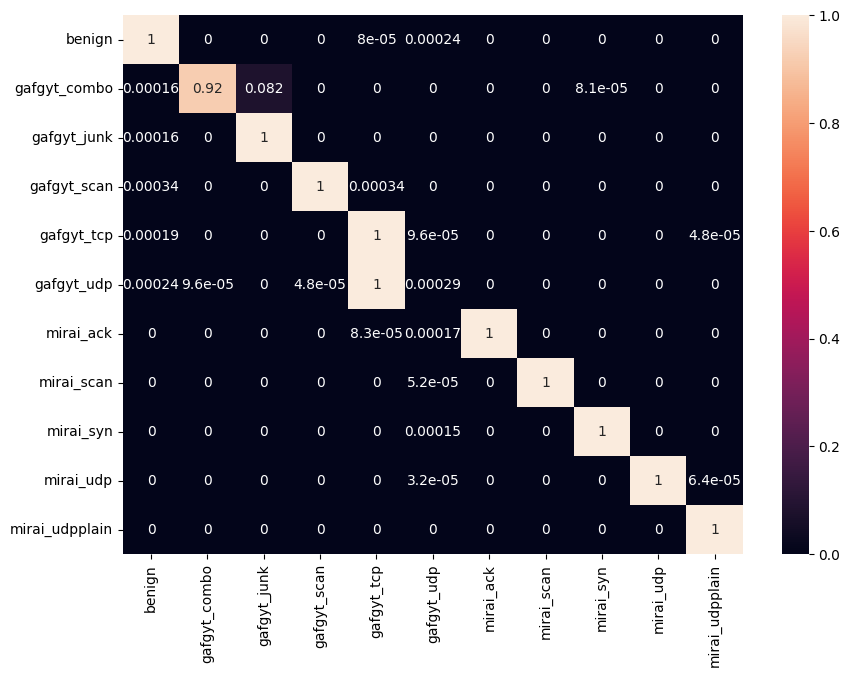

In [ ]:
y_hat = np.argmax(y_hat, axis=1)
y_test = np.argmax(y_test, axis=1)

print_score(y_hat, y_test, cls_label_encoder)

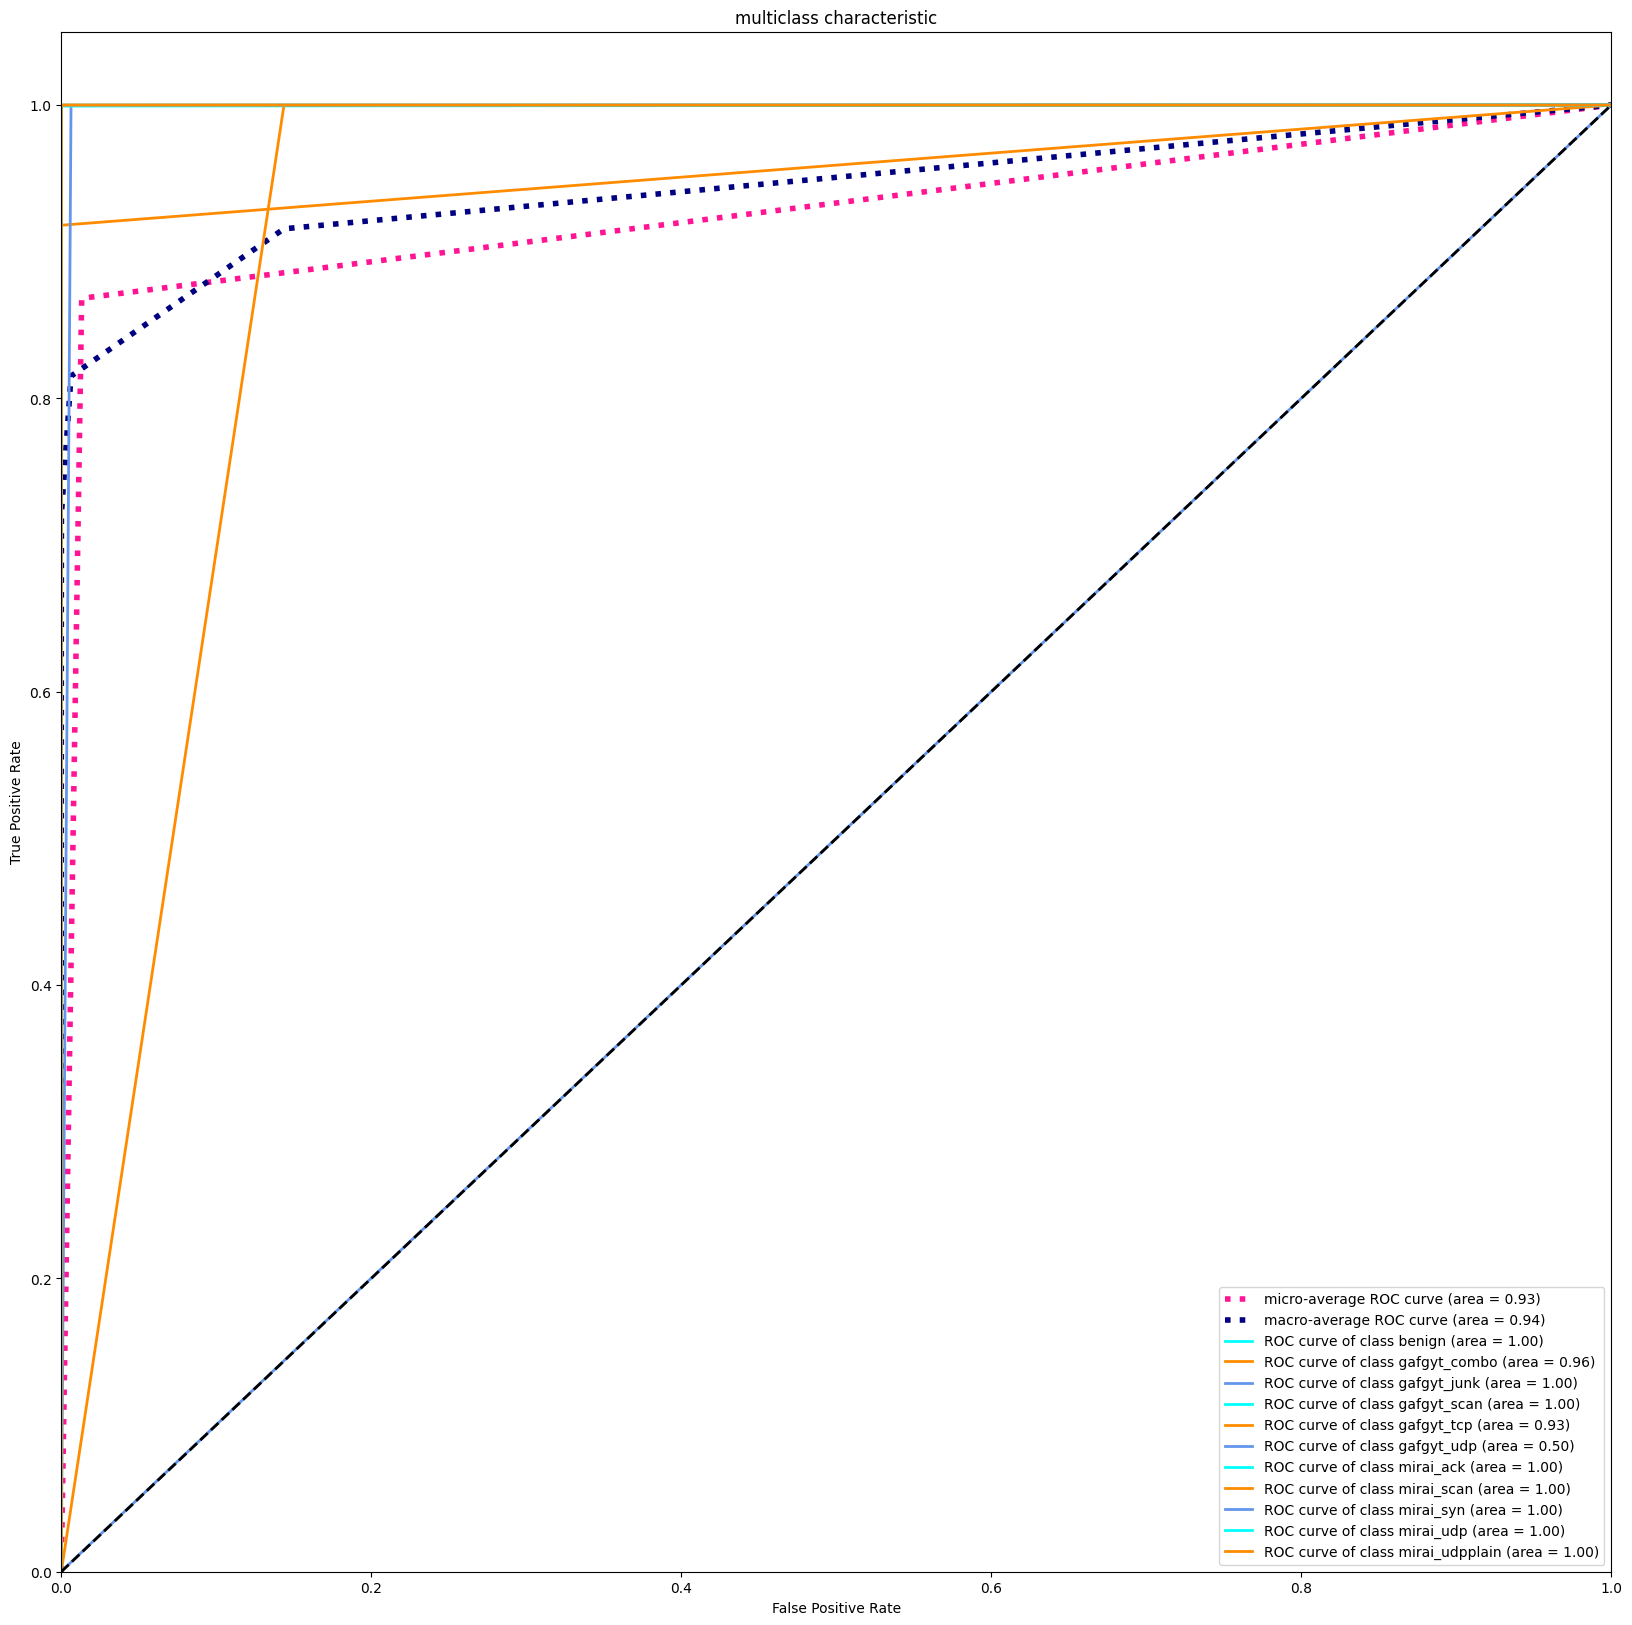

In [ ]:
y_true_ohe = to_categorical(y_test, num_classes=n_classes)
y_hat_ohe =  to_categorical(y_hat, num_classes=n_classes)

ROC_plot(y_true_ohe, y_hat_ohe, cls_label_encoder)

In [7]:
# Load data
benign_df = pd.read_csv('/content/drive/MyDrive/dataset/5.benign.csv')
g_c_df = pd.read_csv('/content/drive/MyDrive/dataset/5.gafgyt.combo.csv')
g_j_df = pd.read_csv('/content/drive/MyDrive/dataset/5.gafgyt.junk.csv')
g_s_df = pd.read_csv('/content/drive/MyDrive/dataset/5.gafgyt.scan.csv')
g_t_df = pd.read_csv('/content/drive/MyDrive/dataset/5.gafgyt.tcp.csv')
g_u_df = pd.read_csv('/content/drive/MyDrive/dataset/5.gafgyt.udp.csv')
m_a_df = pd.read_csv('/content/drive/MyDrive/dataset/5.mirai.ack.csv')
m_sc_df = pd.read_csv('/content/drive/MyDrive/dataset/5.mirai.scan.csv')
m_sy_df = pd.read_csv('/content/drive/MyDrive/dataset/5.mirai.syn.csv')
m_u_df = pd.read_csv('/content/drive/MyDrive/dataset/5.mirai.udp.csv')
m_u_p_df = pd.read_csv('/content/drive/MyDrive/dataset/5.mirai.udpplain.csv')



In [8]:
# Concatenate dataframes
df = pd.concat([benign_df, m_u_df, g_c_df, g_j_df, g_s_df, g_t_df, g_u_df, m_a_df, m_sc_df, m_sy_df, m_u_p_df], axis=0, sort=False, ignore_index=True)



In [9]:

df["type"] = "benign"
df.loc[len(df)-len(m_u_df):, "type"] = "mirai_udp"
df.loc[len(df)-len(g_c_df):-len(m_u_df), "type"] = "gafgyt_combo"
df.loc[len(df)-len(g_j_df)-len(g_c_df):-len(m_u_df)-len(g_c_df), "type"] = "gafgyt_junk"
df.loc[len(df)-len(g_s_df)-len(g_j_df)-len(g_c_df):-len(m_u_df)-len(g_c_df)-len(g_j_df), "type"] = "gafgyt_scan"
df.loc[len(df)-len(g_t_df)-len(g_s_df)-len(g_j_df)-len(g_c_df):-len(m_u_df)-len(g_c_df)-len(g_j_df)-len(g_s_df), "type"] = "gafgyt_tcp"
df.loc[len(df)-len(g_u_df)-len(g_t_df)-len(g_s_df)-len(g_j_df)-len(g_c_df):-len(m_u_df)-len(g_c_df)-len(g_j_df)-len(g_s_df)-len(g_t_df), "type"] = "gafgyt_udp"
df.loc[len(df)-len(m_a_df)-len(g_u_df)-len(g_t_df)-len(g_s_df)-len(g_j_df)-len(g_c_df):-len(m_u_df)-len(g_c_df)-len(g_j_df)-len(g_s_df)-len(g_t_df)-len(g_u_df), "type"] = "mirai_ack"
df.loc[len(df)-len(m_sc_df)-len(m_a_df)-len(g_u_df)-len(g_t_df)-len(g_s_df)-len(g_j_df)-len(g_c_df):-len(m_u_df)-len(g_c_df)-len(g_j_df)-len(g_s_df)-len(g_t_df)-len(g_u_df)-len(m_a_df), "type"] = "mirai_scan"
df.loc[len(df)-len(m_sy_df)-len(m_sc_df)-len(m_a_df)-len(g_u_df)-len(g_t_df)-len(g_s_df)-len(g_j_df)-len(g_c_df):-len(m_u_df)-len(g_c_df)-len(g_j_df)-len(g_s_df)-len(g_t_df)-len(g_u_df)-len(m_a_df)-len(m_sc_df), "type"] = "mirai_syn"
df.loc[len(df)-len(m_u_p_df)-len(m_sy_df)-len(m_sc_df)-len(m_a_df)-len(g_u_df)-len(g_t_df)-len(g_s_df)-len(g_j_df)-len(g_c_df):-len(m_u_df)-len(g_c_df)-len(g_j_df)-len(g_s_df)-len(g_t_df)-len(g_u_df)-len(m_a_df)-len(m_sc_df)-len(m_sy_df), "type"] = "mirai_udpplain"



In [ ]:
def split_sequence(sequence, n_steps):
    """
    Splits a sequence into sub-sequences of length 'n_steps'
    """
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence):
            break
        # gather input and output parts
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
import numpy as np

# generate a simple sine wave dataset
time = np.linspace(0, 10, 1000)
data = np.sin(time)

# add some noise to the dataset
data += np.random.normal(scale=0.1, size=len(data))

In [ ]:
import numpy as np
time = np.linspace(0, 10, 1000)
data = np.sin(time)
data += np.random.normal(scale=0.1, size=len(data))
data = data.reshape((len(data), 1))
X, y = split_sequence(data, n_steps=20)
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_steps = 20
X_train = X_train.reshape((X_train.shape[0], n_steps, 1))
X_test = X_test.reshape((X_test.shape[0], n_steps, 1))
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(n_steps, 1)))
model.add(SimpleRNN(units=50, activation='tanh'))
model.add(Dense(units=y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
H = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy: {:.2f}".format(accuracy))
from sklearn.metrics import precision_score, f1_score, recall_score
y_pred = np.argmax(model.predict(X_test), axis=1)
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
print("Test Precision: {:.2f}".format(precision))
print("Test F1 Score: {:.2f}".format(f1))
print("Test Recall: {:.2f}".format(recall))

Epoch 1/50
25/25 [==============================] - 6s 55ms/step - loss: 0.4304 - accuracy: 0.8151 - val_loss: 0.3375 - val_accuracy: 0.8782
Epoch 2/50
25/25 [==============================] - 0s 14ms/step - loss: 0.2918 - accuracy: 0.8967 - val_loss: 0.3037 - val_accuracy: 0.8782
Epoch 3/50
25/25 [==============================] - 0s 15ms/step - loss: 0.2701 - accuracy: 0.8954 - val_loss: 0.2856 - val_accuracy: 0.8731
Epoch 4/50
25/25 [==============================] - 0s 15ms/step - loss: 0.2961 - accuracy: 0.8980 - val_loss: 0.3092 - val_accuracy: 0.8782
Epoch 5/50
25/25 [==============================] - 0s 16ms/step - loss: 0.2684 - accuracy: 0.8954 - val_loss: 0.2897 - val_accuracy: 0.8782
Epoch 6/50
25/25 [==============================] - 0s 14ms/step - loss: 0.2608 - accuracy: 0.8967 - val_loss: 0.2825 - val_accuracy: 0.8782
Epoch 7/50
25/25 [==============================] - 0s 13ms/step - loss: 0.2446 - accuracy: 0.8967 - val_loss: 0.2676 - val_accuracy: 0.8782
Epoch 8/50
25

In [10]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["type"])


In [12]:
y = to_categorical(y, num_classes=len(label_encoder.classes_))


NameError: name 'to_categorical' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["type"]), y, test_size=0.2, shuffle=True, stratify=y)

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
xgb_rnn = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(label_encoder.classes_),
    max_depth=6,
    learning_rate=0.1,
    n_estimators=1000,
    n_jobs=-1,
    seed=42
)


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_rnn = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=100,
    learning_rate=0.1,
    early_stopping_rounds=50,
    verbose=True
)
xgb_rnn.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

y_pred = xgb_rnn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
y_pred_ohe = to_categorical(y_pred, num_classes=len(label_encoder.classes_))


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 0.15364993
Mean Absolute Error: 0.3078026
R2 Score: -0.0003113603870334991


In [ ]:

y_pred_binary = (y_pred >= 0.5).astype(int)

In [ ]:

f1_score = classification_report(y_test, y_pred_binary, output_dict=True)["macro avg"]["f1-score"]
recall = classification_report(y_test, y_pred_binary, output_dict=True)["macro avg"]["recall"]
accuracy = np.mean(y_pred_binary == y_test)
precision = classification_report(y_test, y_pred_binary, output_dict=True)["macro avg"]["precision"]

print("F1 Score:", f1_score)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("Precision:", precision)


F1 Score: 1.0
Recall: 1.0
Accuracy: 1.0
Precision: 1.0
